# Prototype prism

This notebook presents a general approach for implementing the gravitational potential and the vertical component of the gravitational acceleration produced by a rectangular prism by using the analytical formulas of Nagy et al (2000, 2002). This prototype is highly inspired on [Harmonica](https://www.fatiando.org/harmonica/latest/index.html) (Uieda et al, 2020). It makes use of the modified arctangent function proposed by Fukushima (2020, eq. 72) and of a modified logarithm function for dealing with singularities at some computation points.

* Nagy, D., Papp, G., and Benedek, J. (2000). The gravitational potential and its derivatives for the prism: Journal of Geodesy, 74, 552–560, http://doi.org/10.1007/s001900000116.
* Nagy, D., Papp, G., and Benedek, J. (2002). Corrections to "The gravitational potential and its derivatives for the prism": Journal of Geodesy, 76, 475, http://doi.org/10.1007/s00190-002-0264-7
* Fukushima, T. (2020). Speed and accuracy improvements in standard algorithm for prismatic gravitational field. Geophysical Journal International, 222(3), 1898–1908. http://doi.org/10.1093/gji/ggaa240 
* Uieda, Leonardo, Soler, Santiago R., Pesce, Agustina, Oliveira Jr, Vanderlei C, and Shea, Nicholas. (2020, February 27). Harmonica: Forward modeling, inversion, and processing gravity and magnetic data (Version v0.1.0). Zenodo. http://doi.org/10.5281/zenodo.3628742

In [1]:
import numpy as np
from numba import njit
import matplotlib.pyplot as plt

In [2]:
import prism

In [3]:
# Create a set of computation points
shape = (30, 30)
y = np.linspace(-5000, 5000, shape[0])
x = np.linspace(-4000, 6000, shape[1])
y, x = np.meshgrid(y, x)

y = np.ravel(y)
x = np.ravel(x)
z = np.zeros_like(y) - 150

coordinates = np.vstack([y, x, z])
print(coordinates.shape)

y[:shape[0]:]

x[::shape[1]]

(3, 900)


array([-4000.        , -3655.17241379, -3310.34482759, -2965.51724138,
       -2620.68965517, -2275.86206897, -1931.03448276, -1586.20689655,
       -1241.37931034,  -896.55172414,  -551.72413793,  -206.89655172,
         137.93103448,   482.75862069,   827.5862069 ,  1172.4137931 ,
        1517.24137931,  1862.06896552,  2206.89655172,  2551.72413793,
        2896.55172414,  3241.37931034,  3586.20689655,  3931.03448276,
        4275.86206897,  4620.68965517,  4965.51724138,  5310.34482759,
        5655.17241379,  6000.        ])

In [4]:
# Create a model formed by a single prisms
model = np.array([[-600, 700, -800, 500, 500, 1300]])

density = np.array([1000]) # 1000 kg/m³ = 1 g/cm³
magnetization = np.array([[1.0, 90, 0]])

In [5]:
# Compute the gravitational potential
U = prism.grav(coordinates=coordinates, 
               prisms=model, 
               density=density, 
               field='g_potential')

In [6]:
# Compute the vertical component of acceleration
gz = prism.grav(coordinates=coordinates, 
                prisms=model, 
                density=density, 
                field='g_z')

In [7]:
# Compute the zz-component of acceleration
gzz = prism.grav(coordinates=coordinates, 
                 prisms=model, 
                 density=density, 
                 field='g_zz')

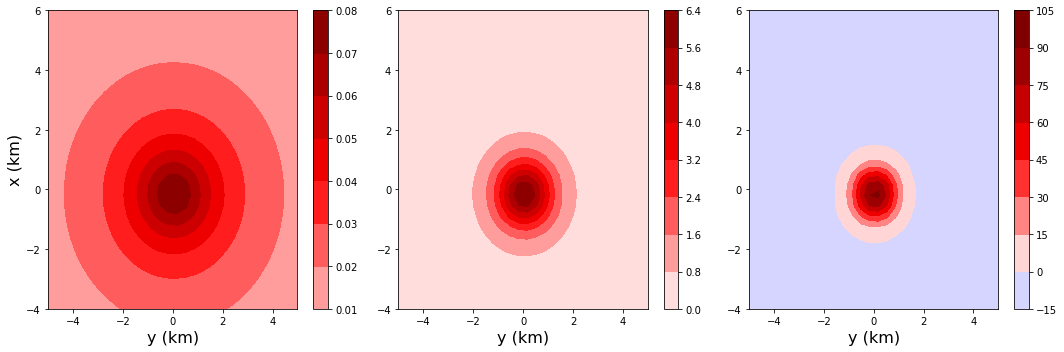

In [8]:
# Plot the results
plt.figure(figsize=(15,5))

plt.subplot(131)
ranges = np.max(np.abs(U))
plt.contourf(y[:shape[0]:]*0.001, x[::shape[1]]*0.001, U.reshape(shape), 
             cmap='seismic', vmin=-ranges, vmax=ranges)
plt.colorbar()
plt.ylabel('x (km)', fontsize=16)
plt.xlabel('y (km)', fontsize=16)

plt.subplot(132)
ranges = np.max(np.abs(gz))
plt.contourf(y[:shape[0]:]*0.001, x[::shape[1]]*0.001, gz.reshape(shape), 
             cmap='seismic', vmin=-ranges, vmax=ranges)
plt.colorbar()
plt.xlabel('y (km)', fontsize=16)

plt.subplot(133)
ranges = np.max(np.abs(gzz))
plt.contourf(y[:shape[0]:]*0.001, x[::shape[1]]*0.001, gzz.reshape(shape), 
             cmap='seismic', vmin=-ranges, vmax=ranges)
plt.colorbar()
plt.xlabel('y (km)', fontsize=16)

plt.tight_layout()

plt.show()

In [9]:
# Compute the magnetic potential
V = prism.mag(coordinates=coordinates, 
              prisms=model, 
              magnetization=magnetization, 
              field='b_potential')

In [10]:
# Compute the vertical component of induction
bz = prism.mag(coordinates=coordinates, 
               prisms=model, 
               magnetization=magnetization,
               field='b_z')

In [11]:
# Compute the x-component of induction
bx = prism.mag(coordinates=coordinates, 
               prisms=model, 
               magnetization=magnetization,
               field='b_x')

In [12]:
# Compute the y-component of induction
by = prism.mag(coordinates=coordinates, 
               prisms=model, 
               magnetization=magnetization,
               field='b_y')

In [13]:
I0, D0 = np.deg2rad(90), np.deg2rad(0)
Fx = np.cos(I0)*np.cos(D0)
Fy = np.cos(I0)*np.sin(D0)
Fz = np.sin(I0)
tf = Fx*bx + Fy*by + Fz*bz

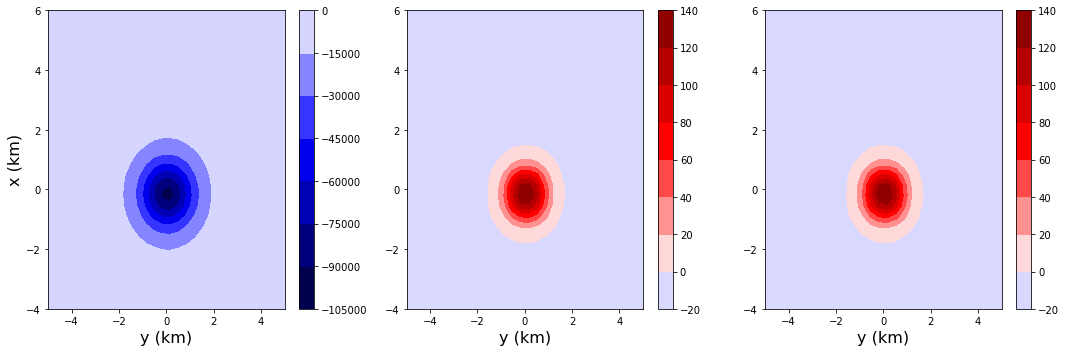

In [14]:
# Plot the results
plt.figure(figsize=(15,5))

plt.subplot(131)
ranges = np.max(np.abs(V))
plt.contourf(y[:shape[0]:]*0.001, x[::shape[1]]*0.001, V.reshape(shape), 
             cmap='seismic', vmin=-ranges, vmax=ranges)
plt.colorbar()
plt.ylabel('x (km)', fontsize=16)
plt.xlabel('y (km)', fontsize=16)

plt.subplot(132)
ranges = np.max(np.abs(bz))
plt.contourf(y[:shape[0]:]*0.001, x[::shape[1]]*0.001, bz.reshape(shape), 
             cmap='seismic', vmin=-ranges, vmax=ranges)
plt.colorbar()
plt.xlabel('y (km)', fontsize=16)

plt.subplot(133)
ranges = np.max(np.abs(tf))
plt.contourf(y[:shape[0]:]*0.001, x[::shape[1]]*0.001, tf.reshape(shape), 
             cmap='seismic', vmin=-ranges, vmax=ranges)
plt.colorbar()
plt.xlabel('y (km)', fontsize=16)

plt.tight_layout()

plt.show()